<a href="https://colab.research.google.com/github/Tizzy1999/ml2019/blob/master/pandas_tutorial2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
url = '/content/gdrive/My Drive/201911ML/ted.txt'
ted = pd.read_csv(url)

##**1. Introduction to dataset**

In [0]:
ted.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [0]:
ted.shape

(2550, 17)

In [0]:
ted.dtypes
# object in pandas is no always string
# it can be any python object, such as dictionary, list and so on

comments               int64
description           object
duration               int64
event                 object
film_date              int64
languages              int64
main_speaker          object
name                  object
num_speaker            int64
published_date         int64
ratings               object
related_talks         object
speaker_occupation    object
tags                  object
title                 object
url                   object
views                  int64
dtype: object

## **2. Which talks provoke the most online discussion?**
1. Consider the limitations and biases of your data when analyzing it
2. Make your results understandable

In [0]:
ted.sort_values('comments').tail()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
1787,2673,Our consciousness is a fundamental aspect of o...,1117,TED2014,1395100800,33,David Chalmers,David Chalmers: How do you explain consciousness?,1,1405350484,"[{'id': 25, 'name': 'OK', 'count': 280}, {'id'...","[{'id': 1308, 'hero': 'https://pe.tedcdn.com/i...",Philosopher,"['brain', 'consciousness', 'neuroscience', 'ph...",How do you explain consciousness?,https://www.ted.com/talks/david_chalmers_how_d...,2162764
201,2877,Jill Bolte Taylor got a research opportunity f...,1099,TED2008,1204070400,49,Jill Bolte Taylor,Jill Bolte Taylor: My stroke of insight,1,1205284200,"[{'id': 22, 'name': 'Fascinating', 'count': 14...","[{'id': 184, 'hero': 'https://pe.tedcdn.com/im...",Neuroanatomist,"['biology', 'brain', 'consciousness', 'global ...",My stroke of insight,https://www.ted.com/talks/jill_bolte_taylor_s_...,21190883
644,3356,"Questions of good and evil, right and wrong ar...",1386,TED2010,1265846400,39,Sam Harris,Sam Harris: Science can answer moral questions,1,1269249180,"[{'id': 8, 'name': 'Informative', 'count': 923...","[{'id': 666, 'hero': 'https://pe.tedcdn.com/im...","Neuroscientist, philosopher","['culture', 'evolutionary psychology', 'global...",Science can answer moral questions,https://www.ted.com/talks/sam_harris_science_c...,3433437
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
96,6404,Richard Dawkins urges all atheists to openly s...,1750,TED2002,1012608000,42,Richard Dawkins,Richard Dawkins: Militant atheism,1,1176689220,"[{'id': 3, 'name': 'Courageous', 'count': 3236...","[{'id': 86, 'hero': 'https://pe.tedcdn.com/ima...",Evolutionary biologist,"['God', 'atheism', 'culture', 'religion', 'sci...",Militant atheism,https://www.ted.com/talks/richard_dawkins_on_m...,4374792


**The potential problem/bias**
* the subcomment contributes to the total comment
* how long the talk has been online

> **solution**: normalize using number of views

In [0]:
ted['comments_per_view'] = ted.comments/ ted.views

In [0]:
ted.sort_values('comments_per_view').tail()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,comments_per_view
954,2492,Janet Echelman found her true voice as an arti...,566,TED2011,1299110400,35,Janet Echelman,Janet Echelman: Taking imagination seriously,1,1307489760,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 453, 'hero': 'https://pe.tedcdn.com/im...",Artist,"['art', 'cities', 'culture', 'data', 'design',...",Taking imagination seriously,https://www.ted.com/talks/janet_echelman,1832930,0.001360
694,1502,Filmmaker Sharmeen Obaid-Chinoy takes on a ter...,489,TED2010,1265760000,32,Sharmeen Obaid-Chinoy,Sharmeen Obaid-Chinoy: Inside a school for sui...,1,1274865960,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 171, 'hero': 'https://pe.tedcdn.com/im...",Filmmaker,"['TED Fellows', 'children', 'culture', 'film',...",Inside a school for suicide bombers,https://www.ted.com/talks/sharmeen_obaid_chino...,1057238,0.001421
96,6404,Richard Dawkins urges all atheists to openly s...,1750,TED2002,1012608000,42,Richard Dawkins,Richard Dawkins: Militant atheism,1,1176689220,"[{'id': 3, 'name': 'Courageous', 'count': 3236...","[{'id': 86, 'hero': 'https://pe.tedcdn.com/ima...",Evolutionary biologist,"['God', 'atheism', 'culture', 'religion', 'sci...",Militant atheism,https://www.ted.com/talks/richard_dawkins_on_m...,4374792,0.001464
803,834,David Bismark demos a new system for voting th...,422,TEDGlobal 2010,1279065600,36,David Bismark,David Bismark: E-voting without fraud,1,1288685640,"[{'id': 25, 'name': 'OK', 'count': 111}, {'id'...","[{'id': 803, 'hero': 'https://pe.tedcdn.com/im...",Voting system designer,"['culture', 'democracy', 'design', 'global iss...",E-voting without fraud,https://www.ted.com/talks/david_bismark_e_voti...,543551,0.001534
744,649,Hours before New York lawmakers rejected a key...,453,New York State Senate,1259712000,0,Diane J. Savino,Diane J. Savino: The case for same-sex marriage,1,1282062180,"[{'id': 25, 'name': 'OK', 'count': 100}, {'id'...","[{'id': 217, 'hero': 'https://pe.tedcdn.com/im...",Senator,"['God', 'LGBT', 'culture', 'government', 'law'...",The case for same-sex marriage,https://www.ted.com/talks/diane_j_savino_the_c...,292395,0.002220


In [0]:
# to make it more interpretable
ted['views_per_comment'] = ted.views/ted.comments

In [0]:
# it takes 450 views to generate a comment
# one out of every 450 people comments on it
ted.sort_values('views_per_comment').head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,comments_per_view,views_per_comment
744,649,Hours before New York lawmakers rejected a key...,453,New York State Senate,1259712000,0,Diane J. Savino,Diane J. Savino: The case for same-sex marriage,1,1282062180,"[{'id': 25, 'name': 'OK', 'count': 100}, {'id'...","[{'id': 217, 'hero': 'https://pe.tedcdn.com/im...",Senator,"['God', 'LGBT', 'culture', 'government', 'law'...",The case for same-sex marriage,https://www.ted.com/talks/diane_j_savino_the_c...,292395,0.002220,450.531587
803,834,David Bismark demos a new system for voting th...,422,TEDGlobal 2010,1279065600,36,David Bismark,David Bismark: E-voting without fraud,1,1288685640,"[{'id': 25, 'name': 'OK', 'count': 111}, {'id'...","[{'id': 803, 'hero': 'https://pe.tedcdn.com/im...",Voting system designer,"['culture', 'democracy', 'design', 'global iss...",E-voting without fraud,https://www.ted.com/talks/david_bismark_e_voti...,543551,0.001534,651.739808
96,6404,Richard Dawkins urges all atheists to openly s...,1750,TED2002,1012608000,42,Richard Dawkins,Richard Dawkins: Militant atheism,1,1176689220,"[{'id': 3, 'name': 'Courageous', 'count': 3236...","[{'id': 86, 'hero': 'https://pe.tedcdn.com/ima...",Evolutionary biologist,"['God', 'atheism', 'culture', 'religion', 'sci...",Militant atheism,https://www.ted.com/talks/richard_dawkins_on_m...,4374792,0.001464,683.134291
694,1502,Filmmaker Sharmeen Obaid-Chinoy takes on a ter...,489,TED2010,1265760000,32,Sharmeen Obaid-Chinoy,Sharmeen Obaid-Chinoy: Inside a school for sui...,1,1274865960,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 171, 'hero': 'https://pe.tedcdn.com/im...",Filmmaker,"['TED Fellows', 'children', 'culture', 'film',...",Inside a school for suicide bombers,https://www.ted.com/talks/sharmeen_obaid_chino...,1057238,0.001421,703.886818
954,2492,Janet Echelman found her true voice as an arti...,566,TED2011,1299110400,35,Janet Echelman,Janet Echelman: Taking imagination seriously,1,1307489760,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 453, 'hero': 'https://pe.tedcdn.com/im...",Artist,"['art', 'cities', 'culture', 'data', 'design',...",Taking imagination seriously,https://www.ted.com/talks/janet_echelman,1832930,0.001360,735.525682


## **3. Visualize the distribution of comments**

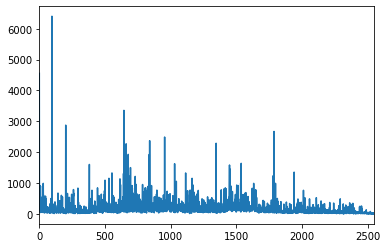

In [0]:
# x is the index
# y is the #comments
ted.comments.plot()

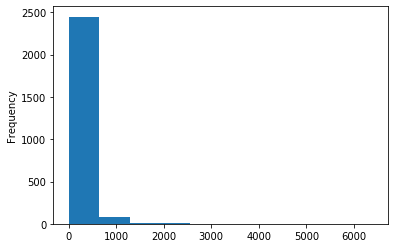

In [0]:
ted.comments.plot(kind='hist')
# histogram: frequency distrubution
# Most talks have comments between [0, 600]
# so, the problem is what's the distribution of data within that first bar

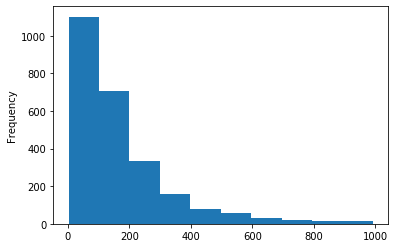

In [0]:
# to make it more informative, filter out everthing above a thousand 
ted[ted.comments < 1000].comments.plot(kind='hist')

In [0]:
# we only lost a little bit of data
ted[ted.comments >= 1000].shape

(32, 19)

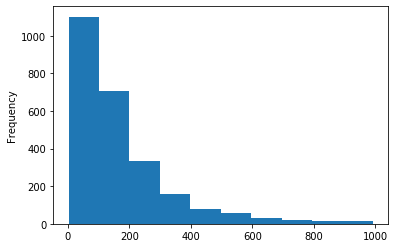

In [0]:
# alternative way of filtering using query
ted.query('comments < 1000').comments.plot(kind='hist')

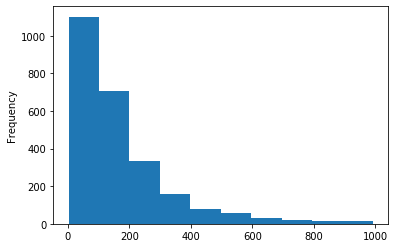

In [0]:
# alternative way of filtering using loc
# for loc, you can pass multiple columns
ted.loc[ted.comments < 1000,'comments'].plot(kind='hist')

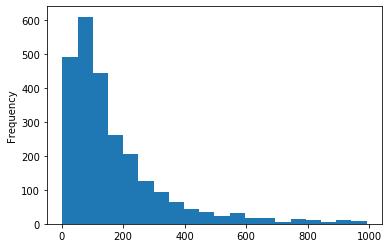

In [0]:
ted.loc[ted.comments < 1000,'comments'].plot(kind='hist', bins=20)
# most comments is between [50, 100]

* line plot: time-series data
* histogram: distrubution
* bar: categories
* box: outliers

## **4. Plot the numebr of talks that took place each year**
1. Read the documentation
2. Use the datetime data type for dates and times
3. Check your work as you go
4. Consider excluding data if it might not be relevant

In [0]:
# random sampling
ted.event.sample(10)
# you can'use event column because it has too many missing values

1596      TEDGlobal 2013
227              TED2008
1424    TEDxBeaconStreet
368              TED2004
2003             TED2015
1666             TED2013
1295      TEDGlobal 2012
866        TEDWomen 2010
223       TEDGlobal 2007
1523      TEDGlobal 2013
Name: event, dtype: object

In [0]:
# obviously, it doesn't work
pd.to_datetime(ted.film_date)

0      1970-01-01 00:00:01.140825600
1      1970-01-01 00:00:01.140825600
2      1970-01-01 00:00:01.140739200
3      1970-01-01 00:00:01.140912000
4      1970-01-01 00:00:01.140566400
                    ...             
2545   1970-01-01 00:00:01.496707200
2546   1970-01-01 00:00:01.492992000
2547   1970-01-01 00:00:01.492992000
2548   1970-01-01 00:00:01.499472000
2549   1970-01-01 00:00:01.492992000
Name: film_date, Length: 2550, dtype: datetime64[ns]

In [0]:
# search online about pd.to_datetime function, you'll find similar cases
ted['film_datetime'] = pd.to_datetime(ted.film_date, unit ='s')

In [0]:
# randomly sample 5 data to verify the results
ted[['event','film_datetime']].sample(5)

,event,film_datetime
528,TEDGlobal 2009,2009-07-22
2395,TEDWomen 2016,2016-10-26
323,TEDSalon 2009 Compassion,2009-10-01
815,TEDGlobal 2010,2010-07-15
675,TED2010,2010-02-10


In [0]:
ted.film_datetime.head()
# you get a datetime object in pandas

0   2006-02-25
1   2006-02-25
2   2006-02-24
3   2006-02-26
4   2006-02-22
Name: film_datetime, dtype: datetime64[ns]

In [0]:
ted.film_datetime.dt.year.value_counts()

2013    270
2011    270
2010    267
2012    267
2016    246
2015    239
2014    237
2009    232
2007    114
2017     98
2008     84
2005     66
2006     50
2003     33
2004     33
2002     27
1998      6
2001      5
1983      1
1991      1
1994      1
1990      1
1984      1
1972      1
Name: film_datetime, dtype: int64

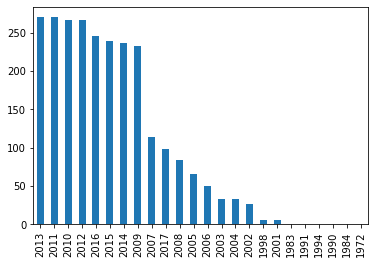

In [0]:
ted.film_datetime.dt.year.value_counts().plot(kind='bar')
# the problem is, bar plot exclude the years without any talks
# even though year can be considered as categories

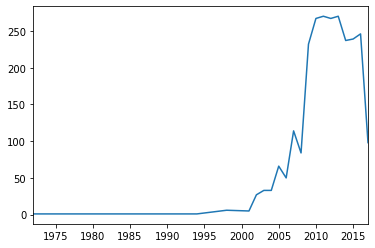

In [0]:
# line plot is better, since it's for time-series data
# remember to sort index while plotting 
ted.film_datetime.dt.year.value_counts().sort_index().plot(kind='line')

In [0]:
# the data that ends in the middle of 2017, which causes the sharp decline
ted.film_datetime.max()

Timestamp('2017-08-27 00:00:00')

## **5.What were the "best" events in TED history to attend ?**
1. Think creatively for how you can use the data you have to answer your question
2. Watch out for small sample sizes
> for example, if you are going to use mean over a set of data, make sure you have enough samples in the first place. Otherwise, the result may be biased.

In [0]:
ted.event.value_counts().head()

TED2014    84
TED2009    83
TED2013    77
TED2016    77
TED2015    75
Name: event, dtype: int64

In [0]:
# the mean number of views for each event
ted.groupby('event').views.mean().head()
# for each event, I want to do some aggregation function on some column
# so, we use mean function over the views

event
AORN Congress                  149818.0
Arbejdsglaede Live             971594.0
BBC TV                         521974.0
Bowery Poetry Club             676741.0
Business Innovation Factory    304086.0
Name: views, dtype: float64

In [0]:
# for each event, views per talk
ted.groupby('event').views.mean().sort_values().tail()

event
TEDxNorrkoping        6569493.0
TEDxCreativeCoast     8444981.0
TEDxBloomington       9484259.5
TEDxHouston          16140250.5
TEDxPuget Sound      34309432.0
Name: views, dtype: float64

In [0]:
 # to get more info, we pass in a list of aggregation functions
 ted.groupby('event').views.agg(['count','mean']).sort_values('mean').tail()
 # as you can see now, there's only one talk for the TEDxPuget Sound event

,count,mean
event,,
TEDxNorrkoping,1,6569493.0
TEDxCreativeCoast,1,8444981.0
TEDxBloomington,2,9484259.5
TEDxHouston,2,16140250.5
TEDxPuget Sound,1,34309432.0


In [0]:
 ted.groupby('event').views.agg(['count','mean','sum']).sort_values('sum').tail()
 # TED2013 event has the most amount of views

,count,mean,sum
event,,,
TED2006,45,3.274345e+06,147345533
TED2015,75,2.011017e+06,150826305
TEDGlobal 2013,66,2.584163e+06,170554736
TED2014,84,2.072874e+06,174121423
TED2013,77,2.302700e+06,177307937


##**6. Unpack the ratings data**

In [0]:
ted.ratings.head()

0    [{'id': 7, 'name': 'Funny', 'count': 19645}, {...
1    [{'id': 7, 'name': 'Funny', 'count': 544}, {'i...
2    [{'id': 7, 'name': 'Funny', 'count': 964}, {'i...
3    [{'id': 3, 'name': 'Courageous', 'count': 760}...
4    [{'id': 9, 'name': 'Ingenious', 'count': 3202}...
Name: ratings, dtype: object

In [0]:
# access one particular piece of data
ted.ratings[0]
# ted.loc[0, 'ratings']

"[{'id': 7, 'name': 'Funny', 'count': 19645}, {'id': 1, 'name': 'Beautiful', 'count': 4573}, {'id': 9, 'name': 'Ingenious', 'count': 6073}, {'id': 3, 'name': 'Courageous', 'count': 3253}, {'id': 11, 'name': 'Longwinded', 'count': 387}, {'id': 2, 'name': 'Confusing', 'count': 242}, {'id': 8, 'name': 'Informative', 'count': 7346}, {'id': 22, 'name': 'Fascinating', 'count': 10581}, {'id': 21, 'name': 'Unconvincing', 'count': 300}, {'id': 24, 'name': 'Persuasive', 'count': 10704}, {'id': 23, 'name': 'Jaw-dropping', 'count': 4439}, {'id': 25, 'name': 'OK', 'count': 1174}, {'id': 26, 'name': 'Obnoxious', 'count': 209}, {'id': 10, 'name': 'Inspiring', 'count': 24924}]"

In [0]:
# basically, a list of dictionaries in string format
type(ted.ratings[0])

str

In [0]:
import ast # abstract syntax tree
ast.literal_eval('[1,2,3]') # if you pass in a string that looks like a list of dicts, you'll get a dict

[1, 2, 3]

In [0]:
ast.literal_eval(ted.ratings[0])

[{'count': 19645, 'id': 7, 'name': 'Funny'},
 {'count': 4573, 'id': 1, 'name': 'Beautiful'},
 {'count': 6073, 'id': 9, 'name': 'Ingenious'},
 {'count': 3253, 'id': 3, 'name': 'Courageous'},
 {'count': 387, 'id': 11, 'name': 'Longwinded'},
 {'count': 242, 'id': 2, 'name': 'Confusing'},
 {'count': 7346, 'id': 8, 'name': 'Informative'},
 {'count': 10581, 'id': 22, 'name': 'Fascinating'},
 {'count': 300, 'id': 21, 'name': 'Unconvincing'},
 {'count': 10704, 'id': 24, 'name': 'Persuasive'},
 {'count': 4439, 'id': 23, 'name': 'Jaw-dropping'},
 {'count': 1174, 'id': 25, 'name': 'OK'},
 {'count': 209, 'id': 26, 'name': 'Obnoxious'},
 {'count': 24924, 'id': 10, 'name': 'Inspiring'}]

In [0]:
# convert a dict-like string to a real dictionary
def str_to_list(ratings_str):
  return ast.literal_eval(ratings_str)


In [0]:
print(ted.ratings[0])
print(type(ted.ratings[0]))

[{'id': 7, 'name': 'Funny', 'count': 19645}, {'id': 1, 'name': 'Beautiful', 'count': 4573}, {'id': 9, 'name': 'Ingenious', 'count': 6073}, {'id': 3, 'name': 'Courageous', 'count': 3253}, {'id': 11, 'name': 'Longwinded', 'count': 387}, {'id': 2, 'name': 'Confusing', 'count': 242}, {'id': 8, 'name': 'Informative', 'count': 7346}, {'id': 22, 'name': 'Fascinating', 'count': 10581}, {'id': 21, 'name': 'Unconvincing', 'count': 300}, {'id': 24, 'name': 'Persuasive', 'count': 10704}, {'id': 23, 'name': 'Jaw-dropping', 'count': 4439}, {'id': 25, 'name': 'OK', 'count': 1174}, {'id': 26, 'name': 'Obnoxious', 'count': 209}, {'id': 10, 'name': 'Inspiring', 'count': 24924}]
<class 'str'>


In [0]:
# create a new column for the ratings list
ted['ratings_list'] = ted.ratings.apply(lambda x: ast.literal_eval(x))

In [0]:
ted.ratings_list[0]

[{'count': 19645, 'id': 7, 'name': 'Funny'},
 {'count': 4573, 'id': 1, 'name': 'Beautiful'},
 {'count': 6073, 'id': 9, 'name': 'Ingenious'},
 {'count': 3253, 'id': 3, 'name': 'Courageous'},
 {'count': 387, 'id': 11, 'name': 'Longwinded'},
 {'count': 242, 'id': 2, 'name': 'Confusing'},
 {'count': 7346, 'id': 8, 'name': 'Informative'},
 {'count': 10581, 'id': 22, 'name': 'Fascinating'},
 {'count': 300, 'id': 21, 'name': 'Unconvincing'},
 {'count': 10704, 'id': 24, 'name': 'Persuasive'},
 {'count': 4439, 'id': 23, 'name': 'Jaw-dropping'},
 {'count': 1174, 'id': 25, 'name': 'OK'},
 {'count': 209, 'id': 26, 'name': 'Obnoxious'},
 {'count': 24924, 'id': 10, 'name': 'Inspiring'}]

In [0]:
# check the data type
type(ted.ratings_list[0])

list

## **7. Count the total number of ratings received by each talk**
* new column named 'num_ratings'

In [0]:
def get_num_ratings(list_of_dicts):
  num = 0
  for d in list_of_dicts:
    num = num + d['count']
  return num


In [0]:
get_num_ratings(ted.ratings_list[0])

93850

In [0]:
pd.DataFrame(ted.ratings_list[0])['count'].sum()

93850

In [0]:
ted['num_ratings'] = ted.ratings_list.apply(get_num_ratings)

In [0]:
ted['num_ratings'].describe()

count     2550.000000
mean      2436.408235
std       4226.795631
min         68.000000
25%        870.750000
50%       1452.500000
75%       2506.750000
max      93850.000000
Name: num_ratings, dtype: float64

## **8. Which occupations deliver the funniest TED talks on average?**


In [0]:
ted.ratings.str.contains('Funny').value_counts(dropna=False)
# looks like Funny ratings exist for every talk

True    2550
Name: ratings, dtype: int64

**Step 1: Count the number of funny ratings**


In [0]:
def get_funny_ratings(list_of_dicts):
  for d in list_of_dicts:
    if(d['name'] == 'Funny'):
      return d['count']
    

In [0]:
get_funny_ratings(ted.ratings_list[0])

19645

In [0]:
ted['funny_ratings'] = ted.ratings_list.apply(get_funny_ratings)

In [0]:
ted.funny_ratings.head()

0    19645
1      544
2      964
3       59
4     1390
Name: funny_ratings, dtype: int64

**Step 2: Calculate the rate of funny ratings**


In [0]:
ted['funny_rate'] = ted.funny_ratings/ ted.num_ratings

In [0]:
ted['funny_rate'].head()

0    0.209323
1    0.185286
2    0.341360
3    0.015826
4    0.054254
Name: funny_rate, dtype: float64

In [0]:
# use our common sense to double check whether the rate is calculated correctly
ted.sort_values('funny_rate').speaker_occupation.tail(20)

1849                       Science humorist
337                                Comedian
124     Performance poet, multimedia artist
315                                  Expert
1168             Social energy entrepreneur
1468                          Ornithologist
595                  Comedian, voice artist
1534                         Cartoon editor
97                                 Satirist
2297                          Actor, writer
568                                Comedian
675                          Data scientist
21                     Humorist, web artist
194                                Jugglers
2273                    Comedian and writer
2114                    Comedian and writer
173                                Investor
747                                Comedian
1398                               Comedian
685             Actor, comedian, playwright
Name: speaker_occupation, dtype: object

In [0]:
# these are the top 20 least funny occupations
ted.sort_values('funny_rate').speaker_occupation.head(20)

2549               Game designer
1612                   Biologist
612                     Sculptor
998               Penguin expert
593                     Engineer
284               Space activist
1041         Biomedical engineer
1618      Spinal cord researcher
2132    Computational geneticist
442                     Sculptor
426              Author, thinker
458                     Educator
2437      Environmental engineer
1491             Photojournalist
1893     Forensic anthropologist
783             Marine biologist
195                    Kenyan MP
772             HIV/AIDS fighter
788            Building activist
936                Neuroengineer
Name: speaker_occupation, dtype: object

**Step 3: Analyze the funny rate by occupation**


In [0]:
# for each occupation, calculate the mean funny rate
ted.groupby('speaker_occupation').funny_rate.mean().sort_values().tail()

speaker_occupation
Comedian                       0.512457
Actor, writer                  0.515152
Actor, comedian, playwright    0.558107
Jugglers                       0.566828
Comedian and writer            0.602085
Name: funny_rate, dtype: float64

In [0]:
# take the sample size into account
ted.speaker_occupation.describe()
# we have 1458 unique occupation, which indicates small sample size

count       2544
unique      1458
top       Writer
freq          45
Name: speaker_occupation, dtype: object

**Step 4: Focus on occupations that are well-represented in the data**


In [0]:
occupation_counts = ted.speaker_occupation.value_counts(dropna=False)

In [0]:
# filter out well-represented occupations
occupation_counts[occupation_counts >= 5]

Writer                   45
Artist                   34
Designer                 34
Journalist               33
Entrepreneur             31
                         ..
Chemist                   5
Social Media Theorist     5
Science writer            5
Musician, activist        5
Paleontologist            5
Name: speaker_occupation, Length: 69, dtype: int64

In [0]:
# get a list of occupations that appear at least 5 times
top_occupations = occupation_counts[occupation_counts >= 5].index

In [0]:
# filter out the top occupations dataframe
ted_top_occupations = ted[ted.speaker_occupation.isin(top_occupations)]

In [0]:
ted_top_occupations.shape

(792, 24)

In [0]:
# remember that groupby should be paired with an aggregation function
ted_top_occupations.groupby('speaker_occupation').funny_rate.mean().sort_values()

speaker_occupation
Surgeon                                       0.002465
Physician                                     0.004515
Photojournalist                               0.004908
Investor and advocate for moral leadership    0.005198
Photographer                                  0.007152
                                                ...   
Data scientist                                0.184076
Producer                                      0.202531
Singer/songwriter                             0.252205
Performance poet, multimedia artist           0.306468
Comedian                                      0.512457
Name: funny_rate, Length: 68, dtype: float64

**weakness of this approach:**
1. small sample size
2. the same performer gives multiple talks
3. some performer has multiple occupations